---
## 프로젝트 추진 배경


- wafer 수율 미달 시, 알람 발생하며 공정 정지
- 하지만, 수율 조건을 만족하면서 **defect이 지속적으로 발생하는 경우**엔 공정 엔지니어가 직접 확인하지 않으면 알 수 없음.
- 이 문제는 그저 wafer위의 이물질을 닦아내면 해결할 수 있는 문제이지만, 시스템은 이를 불량품이라 판단하고 제거함.
- 낙숫물이 댓돌을 뚫는다는 말이 있듯이, 해당 defect이 수 일간 방치된다고 가정하면 수십억대의 손실이 발생할 수 있음.
- 수율 조건을 만족하면서, 연속적으로 발생하는 defect을 탐지하는 알고리즘을 개발하여 손실을 사전에 방지하고자 함.

1. parsing
2. 장비이상검증
3. Lot 이상검증
4. wafer 이상검증

---
## 데이터 개요
- 반도체 검사장비 2대에서 추출한 KLARF 파일 1000개.
- batch process
    - Foup : wafer 25장이 포함된 batch 
    - 현장에선 25장을 채워서 넣진 않음. 
    - foup안에 25장이 있을수도.. 7장,.. 1장.. 다 다름.
    - 이 foup을 Lot-ID로 지정. ex) AS10001T
    - 이 foup을 재검사하는 경우, ex) AS10001T1 

- Lot-ID : 같은 공정을 가진 일련의 
- Wafer-ID
- 현재 이 데이터셋에선 이물이 계속 발생하는 case에서 
    

---
## Flow Chart

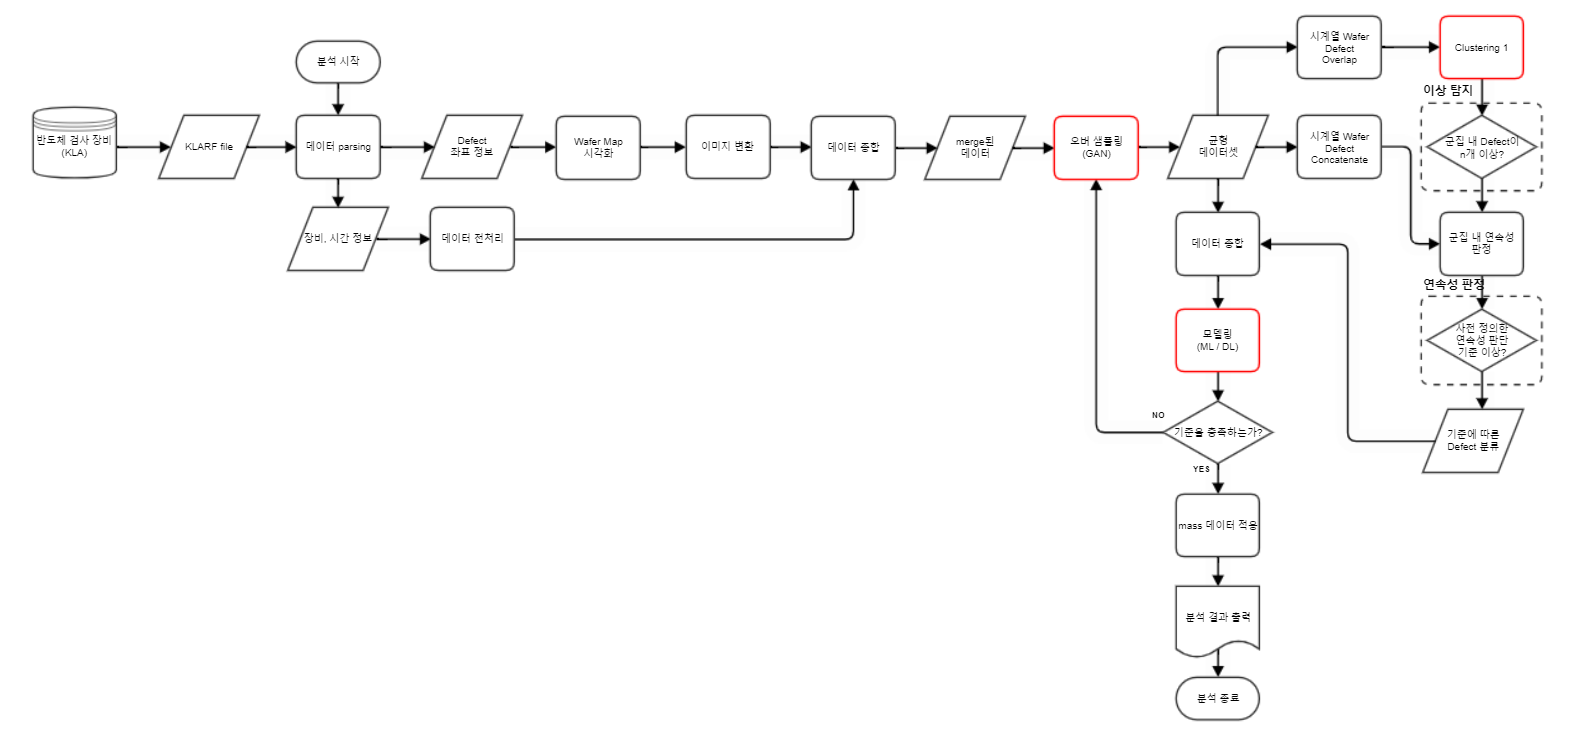

---
## 시작 전...
- python 3.8 version기반으로 팀원 간 동일한 가상환경 구축 완료.
- 각 라이브러리에 대한 버전은 아래에 기술.

In [112]:
''' 라이브러리 버전
anyio==3.5.0
appdirs==1.4.4
argon2-cffi==20.1.0
asttokens==2.0.5
attrs==21.4.0
audioread==3.0.0
Babel==2.9.1
backcall==0.2.0
beautifulsoup4==4.11.1
bleach==4.1.0
Bottleneck==1.3.5
brotlipy==0.7.0
certifi==2022.12.7
cffi==1.15.1
charset-normalizer==2.0.4
colorama==0.4.6
contourpy==1.0.5
cryptography==38.0.4
cycler==0.11.0
debugpy==1.5.1
decorator==5.1.1
defusedxml==0.7.1
entrypoints==0.4
executing==0.8.3
fastjsonschema==2.15.1
flit_core==3.6.0
fonttools==4.25.0
idna==3.4
importlib-metadata==6.0.0
importlib-resources==5.2.0
ipykernel==6.9.1
ipython==8.4.0
ipython-genutils==0.2.0
ipywidgets==7.6.5
jedi==0.18.1
Jinja2==3.0.3
joblib==1.1.1
json5==0.9.6
jsonschema==4.4.0
jupyter==1.0.0
jupyter-client==7.2.2
jupyter-console==6.4.3
jupyter-core==4.10.0
jupyter-server==1.18.1
jupyterlab==3.4.4
jupyterlab-pygments==0.1.2
jupyterlab-server==2.12.0
jupyterlab-widgets==1.0.0
kiwisolver==1.4.4
librosa==0.9.2
llvmlite==0.39.1
MarkupSafe==2.1.1
matplotlib==3.6.2
matplotlib-inline==0.1.2
mistune==0.8.4
mkl-fft==1.3.1
mkl-random==1.2.2
mkl-service==2.4.0
munkres==1.1.4
nbclassic==0.3.5
nbclient==0.5.13
nbconvert==6.4.4
nbformat==5.3.0
nest-asyncio==1.5.5
notebook==6.4.12
numba==0.56.4
numexpr==2.8.4
numpy==1.22.3
packaging==22.0
pandas==1.5.2
pandocfilters==1.5.0
parso==0.8.3
pexpect==4.8.0
pickleshare==0.7.5
Pillow==9.3.0
pip==22.3.1
ply==3.11
pooch==1.6.0
prometheus-client==0.14.1
prompt-toolkit==3.0.20
ptyprocess==0.7.0
pure-eval==0.2.2
pycparser==2.21
Pygments==2.11.2
pyOpenSSL==22.0.0
pyparsing==3.0.9
PyQt5-sip==12.11.0
pyrsistent==0.18.0
PySocks==1.7.1
python-dateutil==2.8.2
pytz==2022.7
pyzmq==23.2.0
qtconsole==5.3.1
QtPy==2.0.1
requests==2.28.1
resampy==0.4.2
scikit-learn==1.1.3
scipy==1.9.3
seaborn==0.12.1
Send2Trash==1.8.0
setuptools==65.6.3
sip==6.6.2
six==1.16.0
sniffio==1.2.0
soundfile==0.11.0
soupsieve==2.3.1
stack-data==0.2.0
terminado==0.13.1
testpath==0.6.0
threadpoolctl==2.2.0
toml==0.10.2
torch==1.13.1
torchaudio==0.13.1
torchvision==0.14.1
tornado==6.2
tqdm==4.64.1
traitlets==5.1.1
typing_extensions==4.4.0
urllib3==1.26.13
wcwidth==0.2.5
webencodings==0.5.1
websocket-client==0.58.0
wheel==0.37.1
widgetsnbextension==3.5.2
zipp==3.11.0
'''

'\nanyio==3.5.0\nappdirs==1.4.4\nargon2-cffi==20.1.0\nasttokens==2.0.5\nattrs==21.4.0\naudioread==3.0.0\nBabel==2.9.1\nbackcall==0.2.0\nbeautifulsoup4==4.11.1\nbleach==4.1.0\nBottleneck==1.3.5\nbrotlipy==0.7.0\ncertifi==2022.12.7\ncffi==1.15.1\ncharset-normalizer==2.0.4\ncolorama==0.4.6\ncontourpy==1.0.5\ncryptography==38.0.4\ncycler==0.11.0\ndebugpy==1.5.1\ndecorator==5.1.1\ndefusedxml==0.7.1\nentrypoints==0.4\nexecuting==0.8.3\nfastjsonschema==2.15.1\nflit_core==3.6.0\nfonttools==4.25.0\nidna==3.4\nimportlib-metadata==6.0.0\nimportlib-resources==5.2.0\nipykernel==6.9.1\nipython==8.4.0\nipython-genutils==0.2.0\nipywidgets==7.6.5\njedi==0.18.1\nJinja2==3.0.3\njoblib==1.1.1\njson5==0.9.6\njsonschema==4.4.0\njupyter==1.0.0\njupyter-client==7.2.2\njupyter-console==6.4.3\njupyter-core==4.10.0\njupyter-server==1.18.1\njupyterlab==3.4.4\njupyterlab-pygments==0.1.2\njupyterlab-server==2.12.0\njupyterlab-widgets==1.0.0\nkiwisolver==1.4.4\nlibrosa==0.9.2\nllvmlite==0.39.1\nMarkupSafe==2.1.1\nma

---
## KLARF 파일 전처리

In [2]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

import os, sys, glob
from tqdm import tqdm

In [3]:
file_path = glob.glob("klarfsample/*.001")

len(file_path)

1000

In [4]:
# 실행할 때마다 한 줄씩 읽어오기
# readlines()로 한번에 시도하면, 용량이 큰 파일의 경우엔 out of memory 가능성.

readlines = []
with open(file_path[3], 'r') as f:
    i = 1
    while True:
        line = f.readline()
        if not line:
            break
        line = str(i) + ' ' + line
        print(line.strip('\n').strip(';').split(' '))
        readlines.append(line.strip('\n').strip(';').split(' '))
        i += 1

['1', 'FileVersion', '1', '1']
['2', 'FileTimestamp', '01-07-23', '13:00:32']
['3', 'TiffSpec', '6.0', 'G', 'R']
['4', 'InspectionStationID', '"ASAC', 'TECHNOLOGY', 'INC"', '"A3D02"', '"A3D02"']
['5', 'SampleType', 'WAFER']
['6', 'ResultTimestamp', '01-07-23', '13:00:32']
['7', 'LotID', '"AS10016TK"']
['8', 'SampleSize', '1', '300']
['9', 'DeviceID', '"AS1"']
['10', 'SetupID', '"Metrology-type-01"', '01-07-23', '13:00:32']
['11', 'StepID', '"Metrology-type-01"']
['12', 'SampleOrientationMarkType', 'NOTCH']
['13', 'OrientationMarkLocation', 'DOWN']
['14', 'TiffFilename', 'AS10016TK_AS10016-17_01-07-23_731.tif']
['15', 'DiePitch', '9.308326e+003', '8.178364e+003']
['16', 'DiePitch', '8.000000e+003', '8.000000e+003']
['17', 'WaferID', '', '"17"']
['18', 'Slot', '17']
['19', 'SampleCenterLocation', '0.000', '0.000']
['20', 'InspectionTest', '1']
['21', 'SampleTestPlan', '536']
['22', '18', '26']
['23', '17', '26']
['24', '16', '26']
['25', '15', '26']
['26', '14', '26']
['27', '13', '26']


In [5]:
# 위 과정을 함수화
def readfile(file_path):
    readlines = []
    with open(file_path, 'r') as f:
        i = 1
        while True:
            line = f.readline()
            if not line:
                break
            line = str(i) + ' ' + line
            readlines.append(line.strip('\n').strip(';').split(' '))
            i += 1    
    return readlines

readfile(file_path[0])

[['1', 'FileVersion', '1', '1'],
 ['2', 'FileTimestamp', '01-01-23', '21:16:19'],
 ['3', 'TiffSpec', '6.0', 'G', 'R'],
 ['4',
  'InspectionStationID',
  '"ASAC',
  'TECHNOLOGY',
  'INC"',
  '"A3D02"',
  '"A3D02"'],
 ['5', 'SampleType', 'WAFER'],
 ['6', 'ResultTimestamp', '01-01-23', '21:16:19'],
 ['7', 'LotID', '"AS10330WP"'],
 ['8', 'SampleSize', '1', '300'],
 ['9', 'DeviceID', '"AC1"'],
 ['10', 'SetupID', '"Metrology-Type-01"', '01-01-23', '21:16:19'],
 ['11', 'StepID', '"Metrology-Type-01"'],
 ['12', 'SampleOrientationMarkType', 'NOTCH'],
 ['13', 'OrientationMarkLocation', 'DOWN'],
 ['14', 'TiffFilename', 'AS10330WP_AS10330-14_01-01-23_83.tif'],
 ['15', 'DiePitch', '9.308326e+003', '8.178364e+003'],
 ['16', 'DiePitch', '8.000000e+003', '8.000000e+003'],
 ['17', 'WaferID', '', '"14"'],
 ['18', 'Slot', '14'],
 ['19', 'SampleCenterLocation', '0.000', '0.000'],
 ['20', 'InspectionTest', '1'],
 ['21', 'SampleTestPlan', '536'],
 ['22', '18', '26'],
 ['23', '17', '26'],
 ['24', '16', '26']

### Wafer Map Visuallization

In [6]:
# Wafer Map Frame을 생성하기 위한 좌표 추출
for line in readlines:
    if line[1] == 'SampleTestPlan':
        firstRow = int(line[0])
        print(f'firstRow: {firstRow}')
    elif line[1] == 'AreaPerTest':
        lastRow = int(line[0]) - 2
        print(f'lastRow: {lastRow}')
        
wafer_x_coordinate = [int(line[1]) for line in readlines[firstRow:lastRow+1]]
wafer_y_coordinate = [int(line[2]) for line in readlines[firstRow:lastRow+1]]

print(f'x_min: {min(wafer_x_coordinate)}, x_max: {max(wafer_x_coordinate)}')
print(f'y_min: {min(wafer_y_coordinate)}, y_max: {max(wafer_y_coordinate)}')

firstRow: 21
lastRow: 556
x_min: 1, x_max: 24
y_min: 1, y_max: 26


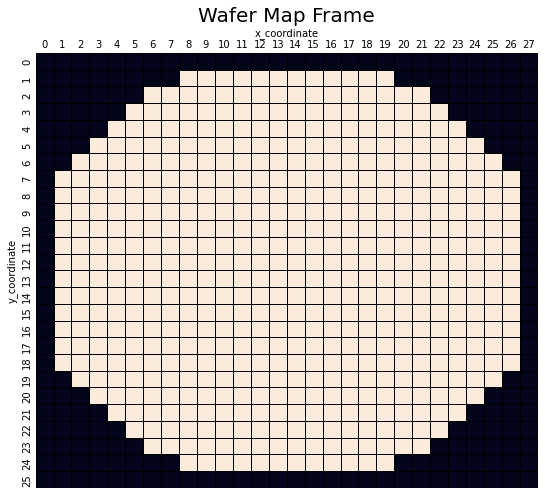

In [7]:
base_wafer = np.zeros([max(wafer_x_coordinate)+2, max(wafer_y_coordinate)+2])
for x,y in zip(wafer_x_coordinate, wafer_y_coordinate):
    base_wafer[x,y] = 1

def visualization_wafer(map, size):
    plt.figure(figsize=(size+1,size))
    ax = sns.heatmap(map, linewidths=1, linecolor='black', cbar=False)
    plt.xlabel("x_coordinate")
    plt.ylabel("y_coordinate")
    ax.xaxis.tick_top()
    ax.xaxis.set_label_position('top')
    ax.tick_params(length=0)
    plt.title("Wafer Map Frame", fontsize=20)
    plt.show()
visualization_wafer(base_wafer, 8)

In [107]:
# DefectList를 dataframe으로 변환.
defectList = []
for fp in tqdm(file_path):
    readlines = readfile(fp)
    for line in readlines:
        if line[1] == 'DefectList':
            defectRow = int(line[0])
        elif line[1] == 'SummarySpec':
            defectRowEND = int(line[0]) - 1
        else:
            continue
        
    defectCols = ['FILE']
    defectCols.extend(readlines[defectRow-2][3:])
    
    if readlines[defectRow][1].isnumeric():
        for line in readlines[defectRow:defectRowEND]:
            if len(line) == 18:
                temp = [fp.split('/')[1]]
                temp.extend(line[1:])
                defectList.append(temp)
    else:
        temp = [fp.split('/')[1]]
        temp.extend(np.zeros(17).tolist())
        defectList.append(temp)

defect_df = pd.DataFrame(data=defectList, columns=defectCols)
defect_df

100%|██████████| 1000/1000 [00:01<00:00, 588.25it/s]


,FILE,DEFECTID,XREL,YREL,XINDEX,YINDEX,XSIZE,YSIZE,DEFECTAREA,DSIZE,CLASSNUMBER,TEST,CLUSTERNUMBER,ROUGHBINNUMBER,FINEBINNUMBER,REVIEWSAMPLE,IMAGECOUNT,IMAGELIST
0,AS10330WP_AS10330-14_01-01-23_83.001,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,AS10103S1_AS10103-14_01-06-23_578.001,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,AC10022T_AC10022-02_01-07-23_780.001,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,AS10016TK_AS10016-17_01-07-23_731.001,1,1.5e+01,2.826e+03,2,1,499.077,502.606,0,0.000000,232,1,0,100,0,0,2,2
4,AC10010S1_AC10010-07_01-03-23_297.001,1,5.98e+03,5.289e+03,8,2,506.242,488.036,0,0.000000,232,1,0,100,0,0,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1315,AC10002SA_AC10002-01_01-01-23_1.001,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1316,AC10002SA_AC10002-21_01-01-23_21.001,1,7.75e+02,2.07e+03,13,15,529.648,520.685,0,0.000000,232,1,0,100,0,0,2,2
1317,AC10002SA_AC10002-21_01-01-23_21.001,1,5.949e+03,3.836e+03,10,5,491.581,516.865,0,0.000000,232,1,0,100,0,0,2,2
1318,AS20010SS_AS20010-12_01-02-23_179.001,1,5.425e+03,9.87e+02,17,16,494.287,489.669,0,0.000000,232,1,0,100,0,0,2,2


In [108]:
# Summary Spec.을 DataFrame으로 변환

summarySpec = []
for fp in tqdm(file_path):
    readlines = readfile(fp)
    for line in readlines:
        if line[1] == 'SummarySpec':
            summaryRow = int(line[0])
            
    summaryCols = ['FILE']
    summaryCols.extend(readlines[summaryRow-1][3:])
    if readlines[summaryRow+1][1].isnumeric():
        temp = [fp.split('/')[1]]
        temp.extend(readlines[summaryRow+1][1:])
        summarySpec.append(temp)
    else:
        temp = [fp.split('/')[1]]
        temp.extend(np.zeros(5).tolist())
        summarySpec.append(temp)

summary_df = pd.DataFrame(data=summarySpec, columns=summaryCols, index=np.arange(1000))
summary_df

,FILE,TESTNO,NDEFECT,DEFDENSITY,NDIE,NDEFDIE
0,AS10330WP_AS10330-14_01-01-23_83.001,1,0,1.000,536,0
1,AS10103S1_AS10103-14_01-06-23_578.001,1,0,1.000,536,0
2,AC10022T_AC10022-02_01-07-23_780.001,1,0,1.000,536,0
3,AS10016TK_AS10016-17_01-07-23_731.001,1,1,1.000,535,1
4,AC10010S1_AC10010-07_01-03-23_297.001,1,1,1.000,535,1
...,...,...,...,...,...,...
995,AS10038T1_AS10038-15_01-07-23_704.001,1,1,1.000,535,1
996,AC10002SA_AC10002-01_01-01-23_1.001,1,0,1.000,536,0
997,AC10002SA_AC10002-21_01-01-23_21.001,1,2,1.000,534,2
998,AS20010SS_AS20010-12_01-02-23_179.001,1,1,1.000,535,1


In [109]:
# defect_df와 summary_df merge
defect_df = pd.merge(summary_df, defect_df, how='inner', left_on='FILE', right_on='FILE')
defect_df

,FILE,TESTNO,NDEFECT,DEFDENSITY,NDIE,NDEFDIE,DEFECTID,XREL,YREL,XINDEX,...,DEFECTAREA,DSIZE,CLASSNUMBER,TEST,CLUSTERNUMBER,ROUGHBINNUMBER,FINEBINNUMBER,REVIEWSAMPLE,IMAGECOUNT,IMAGELIST
0,AS10330WP_AS10330-14_01-01-23_83.001,1,0,1.000,536,0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,AS10103S1_AS10103-14_01-06-23_578.001,1,0,1.000,536,0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,AC10022T_AC10022-02_01-07-23_780.001,1,0,1.000,536,0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,AS10016TK_AS10016-17_01-07-23_731.001,1,1,1.000,535,1,1,1.5e+01,2.826e+03,2,...,0,0.000000,232,1,0,100,0,0,2,2
4,AC10010S1_AC10010-07_01-03-23_297.001,1,1,1.000,535,1,1,5.98e+03,5.289e+03,8,...,0,0.000000,232,1,0,100,0,0,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1315,AC10002SA_AC10002-01_01-01-23_1.001,1,0,1.000,536,0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1316,AC10002SA_AC10002-21_01-01-23_21.001,1,2,1.000,534,2,1,7.75e+02,2.07e+03,13,...,0,0.000000,232,1,0,100,0,0,2,2
1317,AC10002SA_AC10002-21_01-01-23_21.001,1,2,1.000,534,2,1,5.949e+03,3.836e+03,10,...,0,0.000000,232,1,0,100,0,0,2,2
1318,AS20010SS_AS20010-12_01-02-23_179.001,1,1,1.000,535,1,1,5.425e+03,9.87e+02,17,...,0,0.000000,232,1,0,100,0,0,2,2


In [111]:
defect_df.NDEFECT.isna().sum()

0

In [42]:
defect_df.NDEFECT.unique()

array(['0', '1', '2'], dtype=object)

In [15]:
defect_df.DEFECTID.unique()

array([0.0, '1'], dtype=object)

In [18]:
defect_df.CLASSNUMBER.unique()

array([0.0, '232'], dtype=object)

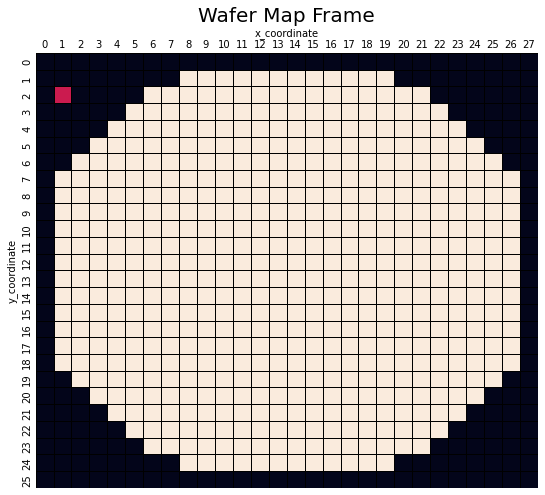

In [9]:
defect_X = int(defect_df.XINDEX[3])
defect_Y = int(defect_df.YINDEX[3])
waferMap = base_wafer.copy()
waferMap[defect_X, defect_Y] = 0.5
visualization_wafer(waferMap,8)

In [44]:
df = pd.DataFrame()
for i, file in enumerate(file_path):
    dict_klarf = {}
    for line in readfile(file):
        if not line[1].isnumeric():
            dict_klarf[line[1]] = ' '.join(line[2:])
            
    temp = pd.DataFrame(dict_klarf, index=[i])
    df = pd.concat([df, temp])
df.head()

,FileVersion,FileTimestamp,TiffSpec,InspectionStationID,SampleType,ResultTimestamp,LotID,SampleSize,DeviceID,SetupID,...,Slot,SampleCenterLocation,InspectionTest,SampleTestPlan,AreaPerTest,DefectRecordSpec,DefectList,SummarySpec,SummaryList,EndOfFile
0,1 1,01-01-23 21:16:19,6.0 G R,"""ASAC TECHNOLOGY INC"" ""A3D02"" ""A3D02""",WAFER,01-01-23 21:16:19,"""AS10330WP""",1 300,"""AC1""","""Metrology-Type-01"" 01-01-23 21:16:19",...,14,0.000 0.000,1,536,4.978698e+010,17 DEFECTID XREL YREL XINDEX YINDEX XSIZE YSIZ...,,5 TESTNO NDEFECT DEFDENSITY NDIE NDEFDIE,,
1,1 1,01-06-23 05:35:07,6.0 G R,"""ASAC TECHNOLOGY INC"" ""A3D02"" ""A3D02""",WAFER,01-06-23 05:35:07,"""AS10103S1""",1 300,"""AS1""","""Metrology-Type-01"" 01-06-23 05:35:07",...,14,0.000 0.000,1,536,4.978698e+010,17 DEFECTID XREL YREL XINDEX YINDEX XSIZE YSIZ...,,5 TESTNO NDEFECT DEFDENSITY NDIE NDEFDIE,,
2,1 1,01-07-23 23:14:07,6.0 G R,"""ASAC TECHNOLOGY INC"" ""A3D01"" ""A3D01""",WAFER,01-07-23 23:14:07,"""AC10022T""",1 300,"""AC1""","""Metrology-Type-02"" 01-07-23 23:14:07",...,02,0.000 0.000,1,536,4.978698e+010,17 DEFECTID XREL YREL XINDEX YINDEX XSIZE YSIZ...,,5 TESTNO NDEFECT DEFDENSITY NDIE NDEFDIE,,
3,1 1,01-07-23 13:00:32,6.0 G R,"""ASAC TECHNOLOGY INC"" ""A3D02"" ""A3D02""",WAFER,01-07-23 13:00:32,"""AS10016TK""",1 300,"""AS1""","""Metrology-type-01"" 01-07-23 13:00:32",...,17,0.000 0.000,1,536,4.978698e+010,17 DEFECTID XREL YREL XINDEX YINDEX XSIZE YSIZ...,,5 TESTNO NDEFECT DEFDENSITY NDIE NDEFDIE,,
4,1 1,01-03-23 17:10:56,6.0 G R,"""ASAC TECHNOLOGY INC"" ""A3D01"" ""A3D01""",WAFER,01-03-23 17:10:56,"""AC10010S1""",1 300,"""AC1""","""Metrology-Type-01"" 01-03-23 17:10:56",...,07,0.000 0.000,1,536,4.978698e+010,17 DEFECTID XREL YREL XINDEX YINDEX XSIZE YSIZ...,,5 TESTNO NDEFECT DEFDENSITY NDIE NDEFDIE,,


In [50]:
temp = pd.concat([df, defect_df], axis=1)
temp[temp.NDEFECT == '2'].WaferID

7       "23"
10      "01"
13      "07"
17      "15"
18      "10"
       ...  
988     "13"
989     "05"
991     "16"
993     "05"
997     "21"
Name: WaferID, Length: 281, dtype: object

In [10]:
df.DefectList.unique()

array([''], dtype=object)

In [11]:
dict_klarf = {line[1]: [] for line in list_klarf if not line[1].isnumeric()}
for file in file_path:
    list_klarf = readfile(file)
    for line in list_klarf:
        if not line[1].isnumeric():
            dict_klarf[line[1]].append([' '.join(line[2:])])

NameError: name 'list_klarf' is not defined

26

---
## EDA

In [11]:
klarf_info = pd.read_csv("./klarf_scenario.txt", sep='\t')
klarf_info.head()

,Lot-ID,Wafer-ID,ResultTimestamp,Machine-ID,Step-ID,Device-ID,Class
0,AC10002SA,AC10002-01,01-01-23 04:10:00,A3D02,Metrology-Type-01,AC1,0
1,AS10001T,AS10001-01,01-01-23 04:12:49,A3D01,Metrology-Type-01,AS1,0
2,AS10001T,AS10001-02,01-01-23 04:38:19,A3D01,Metrology-Type-01,AS1,0
3,AC10002SA,AC10002-03,01-01-23 04:41:51,A3D02,Metrology-Type-01,AC1,0
4,AS10001T,AS10001-03,01-01-23 04:55:52,A3D01,Metrology-Type-01,AS1,0


In [13]:
klarf_info[klarf_info.Class == 2]

,Lot-ID,Wafer-ID,ResultTimestamp,Machine-ID,Step-ID,Device-ID,Class
403,AS10004SS,AS10004-02,01-04-23 16:41:24,A3D01,Metrology-Type-02,AS1,2
407,AS10004SS,AS10004-04,01-04-23 17:40:08,A3D01,Metrology-Type-02,AS1,2
411,AS10004SS,AS10004-06,01-04-23 18:41:59,A3D01,Metrology-Type-02,AS1,2
415,AS10004SS,AS10004-08,01-04-23 19:33:01,A3D01,Metrology-Type-02,AS1,2
419,AS10004SS,AS10004-10,01-04-23 20:23:32,A3D01,Metrology-Type-02,AS1,2
423,AS10004SS,AS10004-12,01-04-23 21:08:22,A3D01,Metrology-Type-02,AS1,2
428,AS10004SS,AS10004-14,01-04-23 22:09:17,A3D01,Metrology-Type-02,AS1,2
432,AS10004SS,AS10004-16,01-04-23 23:03:29,A3D01,Metrology-Type-02,AS1,2
436,AS10004SS,AS10004-18,01-04-23 23:53:14,A3D01,Metrology-Type-02,AS1,2
440,AS10004SS,AS10004-20,01-05-23 00:44:21,A3D01,Metrology-Type-02,AS1,2


In [194]:
klarf_info[klarf_info["Wafer-ID"]=='AS10050-25']

,Lot-ID,Wafer-ID,ResultTimestamp,Machine-ID,Step-ID,Device-ID,Class
673,AS10050TT,AS10050-25,01-07-23 01:03:25,A3D01,Metrology-Type-01,AS1,0
792,AS10050TT,AS10050-25,01-08-23 01:51:52,A3D02,Metrology-type-02,AS1,0
892,AS10050TT,AS10050-25,01-08-23 22:06:42,A3D02,Metrology-type-02,AS1,0


In [264]:
klarf_info[klarf_info["Machine-ID"]=='A3D01']["Device-ID"].unique()

array(['AS1', 'AC1', 'AC2'], dtype=object)

In [24]:
klarf_info.Class.value_counts()

0    762
3     87
5     73
4     41
1     25
2     12
Name: Class, dtype: int64

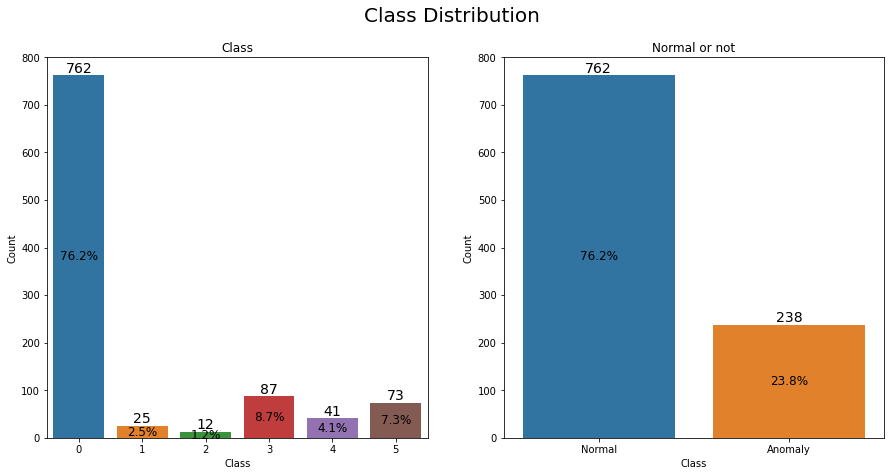

In [192]:
# 'Normal-Anomaly' 비율 그래프
sum_ = klarf_info.Class.count()
anomaly_cnt = klarf_info[~(klarf_info.Class == 0)].Class.value_counts().sum()
normal_cnt = klarf_info[(klarf_info.Class == 0)].Class.count()

cnt = pd.DataFrame([["Normal", normal_cnt],["Anomaly", anomaly_cnt]], columns=["Class", "Counts"])

fig, axes = plt.subplots(ncols=2, figsize=(15,7))

ax1 = sns.countplot(data=klarf_info, x='Class', ax=axes[0])
ax2 = sns.barplot(data=cnt, x='Class', y='Counts', ax=axes[1])

for ax in [ax1, ax2]:
    ax.set_xlabel("Class")
    ax.set_ylabel("Count")
    ax.bar_label(ax.containers[0], fontsize=14)
    for p in ax.patches:
        x = p.get_x() + p.get_width()/2
        y = p.get_y() + p.get_height()/2
        percentage = '{:.1f}%'.format(p.get_height()/(sum_)*100)
        ax.text(
            x, y, percentage, ha='center', va='center', fontsize=12
        )
    
ax1.set_title("Class")
ax2.set_title("Normal or not")

fig.suptitle("Class Distribution", fontsize=20)
plt.show()

In [182]:
klarf_info["Step-ID"].value_counts()

Metrology-Type-01    676
Metrology-type-01    168
Metrology-Type-02    106
Metrology-type-02     50
Name: Step-ID, dtype: int64

In [187]:
klarf_info["Step-ID"] = klarf_info["Step-ID"].apply(lambda x: x.split('-')[0]+
                                                    '-'+'T'+x.split('-')[1][1:]+
                                                    '-'+x.split('-')[2])

Metrology-Type-01    844
Metrology-Type-02    156
Name: Step-ID, dtype: int64

In [190]:
klarf_info["Wafer-ID"].value_counts()

AS10050-23    3
AS10050-25    3
AS10016-11    3
AS10016-09    3
AS10016-08    3
             ..
AS10033-12    1
AC10021-05    1
AS10033-13    1
AS10033-14    1
AC10358-25    1
Name: Wafer-ID, Length: 825, dtype: int64

In [265]:
klarf_info[klarf_info["Wafer-ID"] == 'AS10033-13'] # TSV 공정

,Lot-ID,Wafer-ID,ResultTimestamp,Machine-ID,Step-ID,Device-ID,Class
374,AS10033SS,AS10033-13,01-04-23 10:21:17,A3D02,Metrology-Type-01,AS1,0


In [197]:
klarf_info[klarf_info["Lot-ID"] == 'AS10050TT']["Wafer-ID"].value_counts()

AS10050-01    3
AS10050-15    3
AS10050-03    3
AS10050-23    3
AS10050-21    3
AS10050-19    3
AS10050-17    3
AS10050-25    3
AS10050-13    3
AS10050-09    3
AS10050-07    3
AS10050-05    3
AS10050-11    3
AS10050-14    2
AS10050-22    2
AS10050-20    2
AS10050-18    2
AS10050-16    2
AS10050-08    2
AS10050-12    2
AS10050-10    2
AS10050-06    2
AS10050-04    2
AS10050-02    2
AS10050-24    2
Name: Wafer-ID, dtype: int64

---
## 질문사항 및 답변
1. 모든 컬럼에 대한 details
2. Step-ID 컬럼의 Type, type 부분이 같은 의미인지?
3. Lot-ID, Device-ID가 같은 의미인지? 한 라인에서 쓰는 장비가 1개인지?
4. 한 lot에서 동일 Wafer-ID가 최대 3개 나오는데, 현업에서도 실제로 이런지? 
5. klarf 파일에서 defect list 의미 - defect die 좌표 / defect array in die, 
6. Machine - Device 차이
    - Machine-ID : 가명처리 한 반도체 검사 장비 ID
7. wafer-id가 같다는 의미? 동일한 제품이라는 의미?
8. 한 Lot에서 wafer 종류가 25개인데, 한 공정에서 25종의 wafer가 나오는건지?
9. 이상 데이터의 비율이 너무 큰데, 해도 문제 없는지?

A3D1 : bump 검사장비
이물질로 인한 높이 차이를 defect로 결정.

위 공정을 step으로 표현
A   B   C   D 공정
C Step에서 defect 발견 시, die 제거.

수율 스펙에 미달하면 알람하는 시스템이 이미 구현되어있지만,
시간흐름을 고려하지 않아서, 수율 스펙을 만족하더라도 결점이 지속적으로 발생한다.
이를 해결하고자 함.

시나리오
1. 2개
2. 
3. 
4. 
5. 